# Essentially: why we need equilibrium

- how does structure of data/time series relate to prob distribution?



## other
also: plotting nonlog $e^x$ at different scales together
- what would be function for that manifold?


Learning math is purely creative: "what if we did this" 
    - that what if is always just connecting two areas of math together - combining two parts can lead to symbiosis.
    - combinatorial explosion of math
    
    
Connec to other NB:
- base_n_dimensionality

In [5]:
import numpy as np
import matplotlib.pyplot as plt

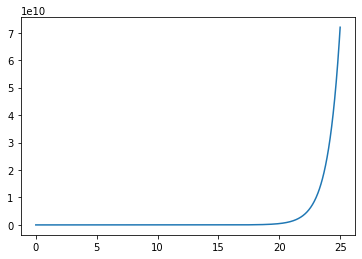

In [8]:


x = np.linspace(0,25,1000)
unchecked_growth = np.exp(x)
plt.plot(x, unchecked_growth)


- for time series, this func might convert into spectral domain first
- exponential growth is also a time series!
- so can implement controller as oscillating between several diffferential equations,
    that go back to original
    - a theoretical example is weather or economics on crop yields
- *machine learning*: how can regression models help learn parameters?
    - eg exponential fit
- CAN THIS CREATE A SINUSOIDAL LIKE TIME SERIES or a chaotic one??
## The big idea:  real life time series are differential equations with possibly different initial conditions AND/OR parameters at each time step!
- applying this to neural data?
    ##### Big note
    - essentially testing different stimulation patterns and effect on time series
- how to make this smooth?
                    
### ALSO
- how do you make a variable act on another? The importance of if logic as path branching
- symbolic math: the goal is for neurons to learn parameters for equations
    - is it possible to also have model free learned weights: too many to describe with symbols

In [149]:
def controller(x, function, params, type="time series"):
    
    """
    x: if static, is just a parameter (like mean)
    params: what kind of trasnformation you want
    type: if 'time series', uses differential equation to consume values and modify it

          if 'static': changes mean etc""" 
    
    y = function(x)
    if type=='static':
        if params == 'noise':
            mean= 10 
            y += np.random.random(size=y.shape)
        elif params == 'mean':
            y += 5
        elif params == 'keep out':
            y = y[y<=0.1]
        
    if type=='time series':
        """ WANT y^kt"""
        # tehse should be params
        # TODO this works with exponential but will have to be arg for other operations, like just adding (e.g + sin(x))
        modification = lambda t, k: t**k
        y = [modification(function(t), k) for t, k in zip(x, params)]
            
        
    return y
    
    
    

# Static data - gaussian example

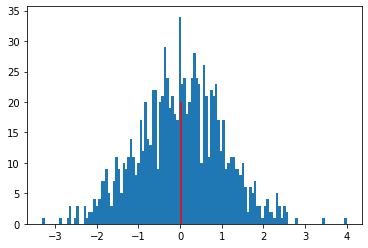

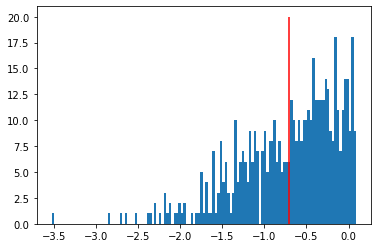

In [99]:

x = 0
shape = 1000
# random normal
func = lambda x: np.random.normal(x, size=1000)
y = func(x)
plt.hist(y, bins=y.shape[0]//8)
plt.vlines(y.mean(), 0, 20, color='red')

plt.figure()
controlled = controller(x, function=func, params='keep out', type='static')
plt.hist(controlled, bins=y.shape[0]//8)
plt.vlines(controlled.mean(), 0, 20, color='red')
plt.show()

# with time series: exponential growth

- what we see here is that this is literally just composition of equation
- e.g., $e^{x*2*sin(x)}$
- or just a sum
- adding noise is yet another example of such a compoisiton

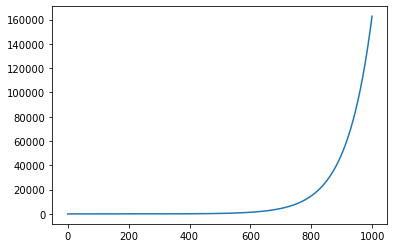

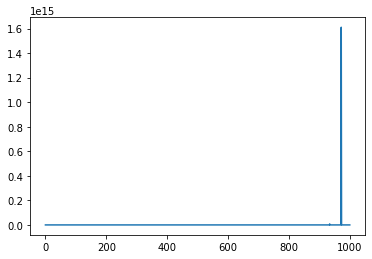

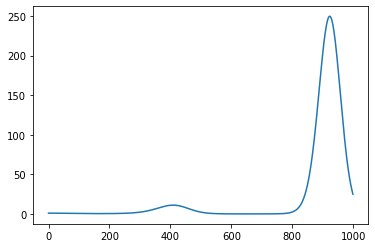

In [110]:
x = np.linspace(0,12, 1000)
func = np.exp
plt.figure()
plt.plot(func(x))
plt.figure()

controlled = controller(x, function=func, params=np.random.normal(size=x.shape[0]), type='time series')
plt.plot(controlled)

### this plot esepcially interesting
plt.figure()
mods = -0.5*np.sin(x)
controlled = controller(x, function=func, params=mods, type='time series')
plt.plot(controlled)

In [ ]:
# here varying the sin

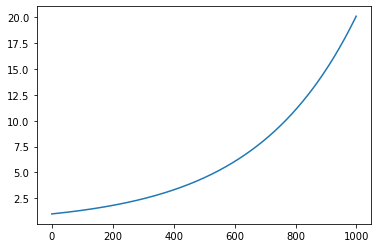

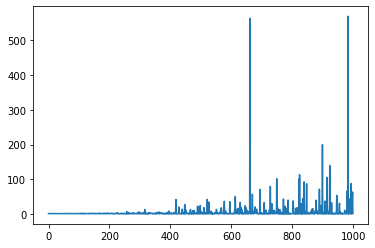

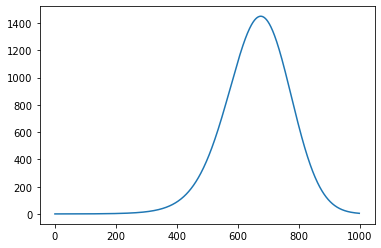

In [115]:
x = np.linspace(0,3, 1000)
func = np.exp
plt.figure()
plt.plot(func(x))
plt.figure()

controlled = controller(x, function=func, params=np.random.normal(size=x.shape[0]), type='time series')
plt.plot(controlled)

plt.figure()
mods = 4*np.sin(x)
controlled = controller(x, function=func, params=mods, type='time series')
plt.plot(controlled)

# neural data

simulate multiple poiisson spiking models
- also figure out how to get binary poisson spiking model

# TODO: add oscillations with sinusoid
- bonus: try to remove oscillation (needs to line up with phase!)
    - essentially cancelling waves

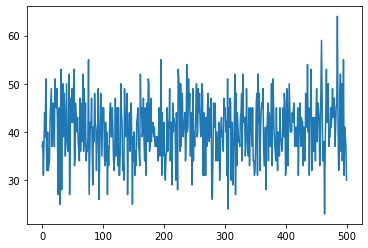

In [148]:
y = np.zeros(500)

number_signals = int(4)
LAM=10
for i in np.arange(number_signals):
    y += np.random.poisson(lam=LAM, size=y.shape[0])
    
plt.plot(y)

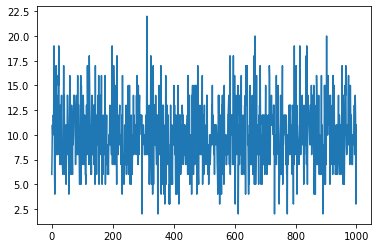

In [147]:
plt.plot(np.random.poisson(lam=10,size=y.shape[0]))

In [122]:
np.random.poisson(y.shape[0])

2

In [127]:
np.random.poisson(lam=1, size=y.shape[0])

array([1, 4, 3, 0])